# <center>Used Bike Prices Analysis</center>

### <center>Internship Project – Data Analytics (Unified Mentor)</center>

This project analyzes used bike price data to understand the factors that influence bike prices using exploratory data analysis and basic feature engineering.


### <center>PROJECT OBJECTIVE</center>

The objective of this project is to analyze used bike prices and identify how factors such as bike age, kilometers driven, fuel type, and ownership affect the resale price.


### <center>IMPORT LIBRARIES</center>


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

### <center>LOAD DATASET</center>

In [7]:
df = pd.read_csv("D:\\Unified Mentor\\used Bike Prices\\bikes.csv")
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


### <center>DATASET OVERVIEW</center>


The dataset contains information about used bikes, including:
- Bike Model name / brand
- Manufacturing year
- Price
- Kilometers driven
- Mileage
- power
- Owner type

In [10]:
# shape of dataset

df.shape

(7857, 8)

In [11]:
# Basic Information of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


In [12]:
# Stastical information of Dataset

df.describe()

,model_year,price
count,7857.000000,7.857000e+03
mean,2015.367698,1.067913e+05
std,4.001443,1.389261e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


### <center>DATA CLEANING</center>

The following data cleaning steps were performed:
- Checked for missing values
- Filled missing values
- Removed duplicate records


In [20]:
# Handling the missing values 

df.isnull().sum()
df.ffill(inplace=True)

In [22]:
df.dtypes

model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object

In [24]:
# Remove Duplicates
df.duplicated().sum()

0

In [26]:
df.drop_duplicates(inplace=True)

### <center>FEATURE ENGINEERING</center>

Feature engineering is performed to create new variables that help in better analysis of used bike prices.


In [31]:
# CREATING NEW BIKE CODE
df["model_year"] = pd.to_numeric(df["model_year"], errors="coerce")

current_year = 2025
df["bike_age"] = current_year - df["model_year"]
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,bike_age
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,8
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,9
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,13
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,8
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,5


In [33]:
df["price"] = df["price"].astype(str).str.replace(",", "").str.replace("₹", "")
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df = df[df["price"].notna()]

In [35]:
df.head()
df.shape

(7857, 9)

In [37]:
df["price"].describe()


count    7.857000e+03
mean     1.067913e+05
std      1.389261e+05
min      0.000000e+00
25%      4.200000e+04
50%      7.500000e+04
75%      1.250000e+05
max      3.000000e+06
Name: price, dtype: float64

### <center>Exploratory Data Analysis (EDA)</center>

EDA is used to identify patterns and relationships between bike prices and other features.


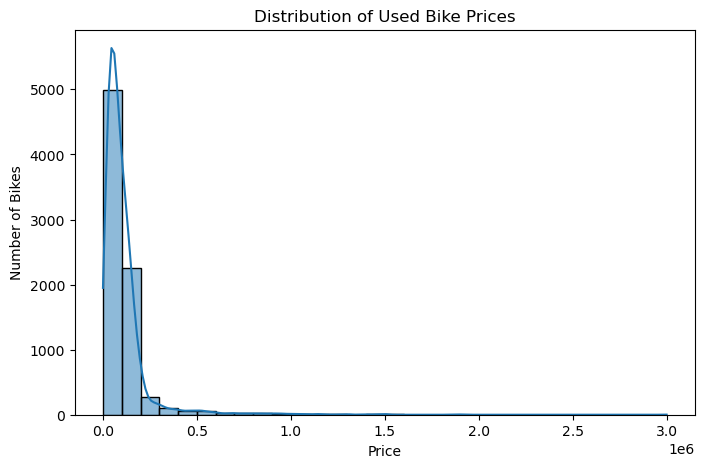

In [43]:
#Price Distribution

plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Distribution of Used Bike Prices")
plt.xlabel("Price")
plt.ylabel("Number of Bikes")
plt.show()


#### Graph summary:
    - Most used bikes are priced in the low to mid-price range, while fewer bikes fall into the high-price category.
    - This indicates that the resale market is dominated by affordable and mid-range bikes.


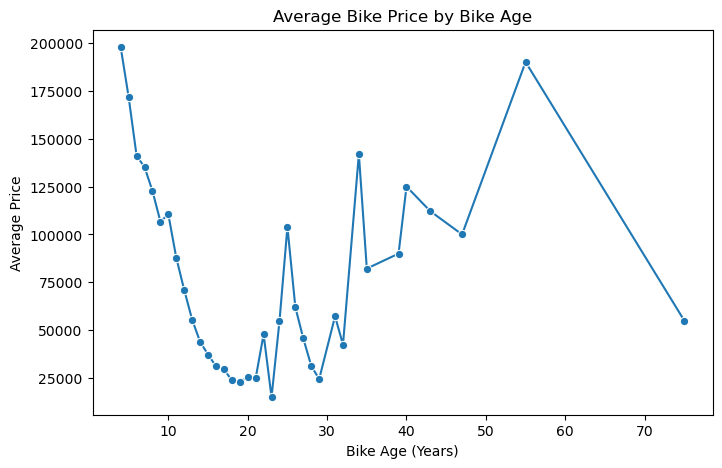

In [101]:
# Bike Price vs Bike age

age_price = df.groupby("bike_age")["price"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=age_price, x="bike_age", y="price", marker="o")
plt.title("Average Bike Price by Bike Age")
plt.xlabel("Bike Age (Years)")
plt.ylabel("Average Price")
plt.show()



#### Graph summary:
    - Bike prices decrease as bike age increases, showing depreciation over time.
    - Newer bikes tend to retain higher resale value compared to older bikes.
    

In [85]:
df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")

In [87]:
df["mileage_bin"] = pd.cut(
    df["mileage"],
    bins=[0, 20, 30, 40, 50, 60, 100],
    labels=["0–20", "21–30", "31–40", "41–50", "51–60", "60+"]
)

C:\Users\saima\AppData\Local\Temp\ipykernel_23376\2445880194.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_price = df.groupby("mileage_bin")["price"].mean().reset_index()


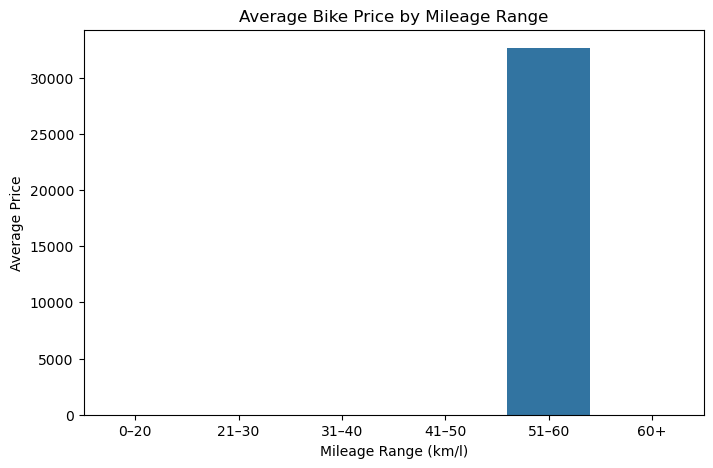

In [104]:
#Bike Price vs Mileage

mileage_price = df.groupby("mileage_bin")["price"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=mileage_price, x="mileage_bin", y="price")
plt.title("Average Bike Price by Mileage Range")
plt.xlabel("Mileage Range (km/l)")
plt.ylabel("Average Price")
plt.show()


#### Graph Summary:

    - The analysis shows that bikes with higher mileage generally maintain better resale value.
    - Fuel-efficient bikes are preferred by buyers, which positively impacts their pricing.

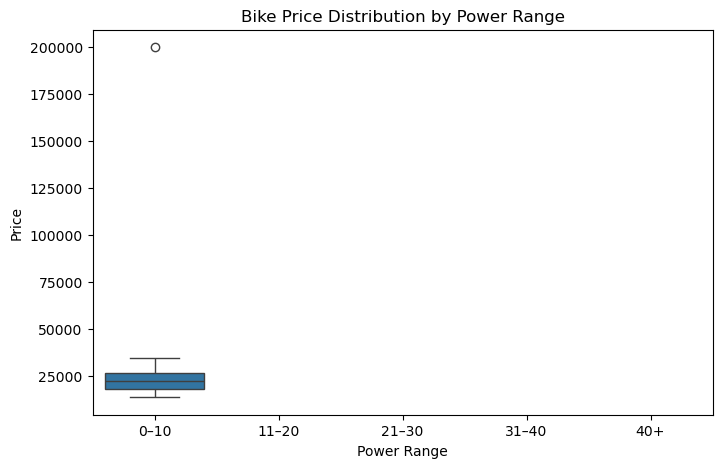

In [106]:
# Bike Price vs Engine Power

df["power_bin"] = pd.cut(
    df["power"],
    bins=[0, 10, 20, 30, 40, 100],
    labels=["0–10", "11–20", "21–30", "31–40", "40+"]
)
plt.figure(figsize=(8,5))
sns.boxplot(x="power_bin", y="price", data=df)
plt.title("Bike Price Distribution by Power Range")
plt.xlabel("Power Range")
plt.ylabel("Price")
plt.show()


#### Graph Summary:
    - Bikes with higher engine power generally have higher resale prices.
    - This indicates that performance-oriented bikes command a premium in the used bike market.


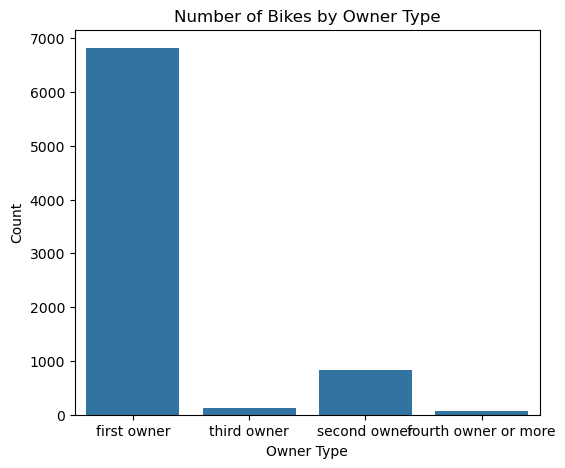

In [121]:
# Owner Type vs Bike Price

plt.figure(figsize=(6,5))
sns.countplot(x="owner", data=df)
plt.title("Number of Bikes by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.show()




#### Graph Summary:
    - First-owner bikes usually have higher resale value compared to bikes with multiple owners.
    - Buyers prefer bikes with fewer ownership transfers.


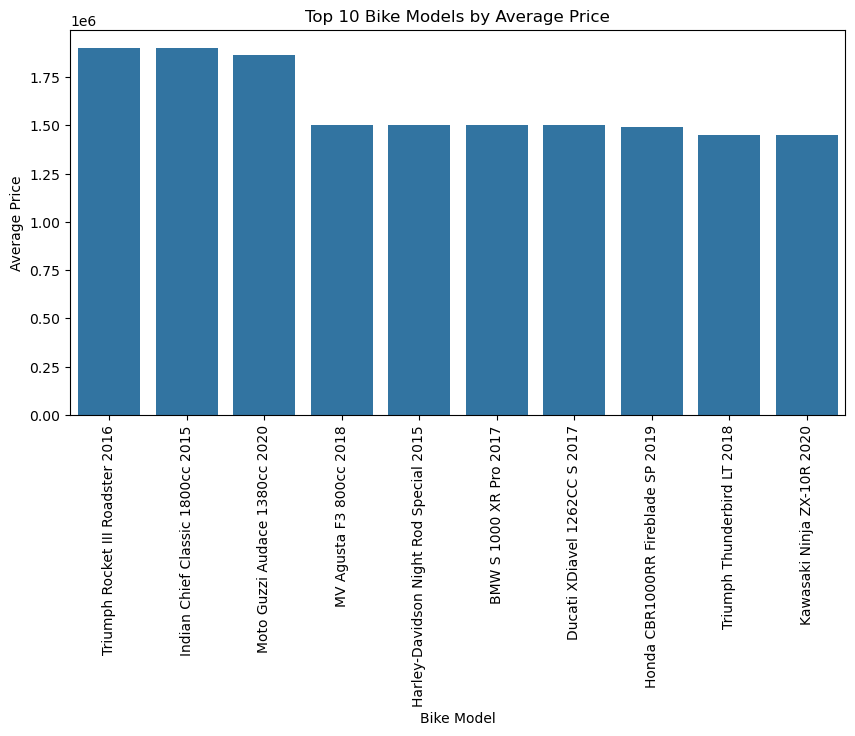

In [110]:
# Analysis by Brand model

top_models = (
    df.groupby("model_name")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=top_models, x="model_name", y="price")
plt.title("Top 10 Bike Models by Average Price")
plt.xlabel("Bike Model")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()


#### Graph summary:
    - Certain bike models consistently command higher average resale prices, highlighting strong brand and model value in the used bike market.


### EDA SUMMARY


The exploratory data analysis of used bike prices revealed the following key insights:

- Most used bikes are priced in the low to mid-price range, with fewer high-priced bikes.
- Bike resale price decreases as bike age increases, showing clear depreciation over time.
- Bikes with higher mileage (better fuel efficiency) tend to have higher average resale prices.
- Higher engine power is associated with higher resale prices, indicating demand for performance-oriented bikes.
- First-owner bikes have the highest average resale prices compared to multi-owner bikes.
- Certain bike models consistently command higher resale prices, reflecting strong brand value.


### BUSINESS INSIGHTS


- Buyers prefer newer bikes with fewer years of usage, which results in higher resale value.
- Fuel efficiency plays an important role in pricing decisions in the used bike market.
- Performance features such as engine power positively influence bike prices.
- Bikes with single ownership history are more trusted and hence priced higher.
- Popular and premium bike models retain better resale value.


## <center>CONCLUSION</center>


- This project analyzed used bike price data to understand the factors influencing resale value.
- The analysis showed that bike age, mileage, engine power, ownership history, and model popularity are key determinants of used bike prices.
- The insights derived from this analysis can help buyers make informed purchasing decisions and assist sellers in pricing their bikes competitively in the used bike market.


### LIMITATIONS



- Some columns such as kilometers driven contained missing values and were excluded from analysis.
- The analysis is based only on historical data and does not include predictive modeling.
- Prices may vary due to market conditions, which are not captured in this dataset.


### FUTURE SCOPE


- Build a machine learning model to predict bike prices based on available features.
- Include additional factors such as service history and accident records.
- Perform time-based analysis to study price trends over different years.


### FINAL NOTE


- This project demonstrates practical data cleaning, feature engineering, and exploratory data analysis
skills using Python.
- The visualizations and insights reflect real-world data analytics practices.
